In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np

from pandas import DataFrame, Series
from datetime import datetime

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# data loading
from random import *
import numpy as np
import os
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
state_dim = 2
state_range = 100
num_action = 39
action_range=200
action_range1=200
action_range2=50


In [ ]:
#3년
filename = '/content/drive/MyDrive/[003] [전라남도 강진군 신전면 영관리]-data-2022-02-21 16_08_43.csv'
solar = pd.read_csv(filename)
solar.head(10)

,Time,deviceNum,siteID,acA,acV,capacity,cumulativePower,dailyPower,dcA,dcV,dcKW
0,2019-01-01 07:53:29,1,3,0.4,382.0,97.2,108877.0,0.0,0.2,507.0,0.1
1,2019-01-01 07:58:09,1,3,0.8,382.0,97.2,108877.0,0.0,0.4,523.0,0.2
2,2019-01-01 08:05:09,1,3,1.4,382.0,97.2,108877.0,0.0,0.7,543.0,0.3
3,2019-01-01 08:09:49,1,3,1.6,382.0,97.2,108877.0,0.0,0.7,549.0,0.4
4,2019-01-01 08:14:29,1,3,1.9,382.0,97.2,108877.0,0.0,0.8,552.0,0.4
5,2019-01-01 08:19:09,1,3,2.3,382.0,97.2,108877.0,0.1,0.9,557.0,0.5
6,2019-01-01 08:23:49,1,3,2.3,382.0,97.2,108877.0,0.1,1.0,560.0,0.5
7,2019-01-01 08:28:29,1,3,3.1,382.0,97.2,108877.0,0.2,1.2,564.0,0.7
8,2019-01-01 08:33:09,1,3,2.8,383.0,97.2,108877.0,0.2,1.1,562.0,0.6
9,2019-01-01 08:40:09,1,3,3.5,383.0,97.2,108877.0,0.3,1.4,565.0,0.8


In [ ]:
# filename = '/content/drive/MyDrive/(003) (전라남도 강진군 신전면 영관리)-data-21-1_12.csv'
# solar = pd.read_csv(filename)
# solar.head(10)

In [ ]:
def str2time(string) :
    # str -> time
    d_result = datetime.strptime(string, '%Y-%m-%d %H:%M:%S')
    return d_result

In [ ]:
solar['Time'] = solar['Time'].map(lambda d : str2time(d))
solar = solar.set_index('Time', drop = True)

In [ ]:
## deviceNum = 1에 대해 보간법 실시

# 보간법 사용 X
deviceNum = solar['deviceNum'].unique()
device = []
for n in range(1, len(deviceNum) + 1) :
    # globals() ['device_{}'.format(n)] = solar[solar['deviceNum'] == n].resample('T').first()
    # device.append('device_{}'.format(n))
    # 선형 비례 결측 보간(interpolate : default값 = linear)
    # globals() ['device_{}'.format(n)] = globals() ['device_{}'.format(n)].interpolate()
    globals() ['device_{}'.format(n)] = solar[solar['deviceNum'] == n]
    device.append(globals() ['device_{}'.format(n)])
    print('device_{}'.format(n))

device_1
device_2
device_3
device_4
device_5


In [ ]:
device_1

,deviceNum,siteID,acA,acV,capacity,cumulativePower,dailyPower,dcA,dcV,dcKW
Time,,,,,,,,,,
2019-01-01 07:53:29,1,3,0.4,382.0,97.2,108877.0,0.0,0.2,507.0,0.1
2019-01-01 07:58:09,1,3,0.8,382.0,97.2,108877.0,0.0,0.4,523.0,0.2
2019-01-01 08:05:09,1,3,1.4,382.0,97.2,108877.0,0.0,0.7,543.0,0.3
2019-01-01 08:09:49,1,3,1.6,382.0,97.2,108877.0,0.0,0.7,549.0,0.4
2019-01-01 08:14:29,1,3,1.9,382.0,97.2,108877.0,0.0,0.8,552.0,0.4
...,...,...,...,...,...,...,...,...,...,...
2022-01-31 17:48:06,1,3,1.0,385.0,97.2,191939.0,96.9,0.5,537.0,0.2
2022-01-31 17:55:06,1,3,0.5,384.0,97.2,191939.0,96.9,0.3,515.0,0.1
2022-01-31 17:59:46,1,3,0.3,383.0,97.2,191940.0,97.0,0.1,497.0,0.1


In [ ]:
# ## csv 파일들을 DataFrame으로 불러와서 concat(3년)

import os
path = '/content/drive/MyDrive/강진군_ASOS_시간-20250306T031549Z-001/강진군_ASOS_시간/'
li_file = os.listdir(path)
# 파일명 끝이 .csv인 경우
li_file_py = [file for file in li_file if file.endswith('.csv')]

In [ ]:
## csv 파일들을 DataFrame으로 불러와서 concat

climate = pd.DataFrame()
for c in li_file_py :
    print(c)
    data = pd.read_csv(path + c, encoding = 'euc-kr')
    climate = pd.concat([climate, data])

climate = climate.reset_index(drop = True)

신전면19~20.csv
신전면20~21.csv
신전면21~22.csv
신전면22.csv


In [ ]:
climate['일시'] = pd.to_datetime(climate['일시'])
climate = climate.set_index('일시', drop = True).drop('지점명', axis = 1).drop('지점', axis = 1)

In [ ]:
## csv 파일들을 DataFrame으로 불러와서 concat(3년)

# climate = pd.read_csv('/content/drive/MyDrive/OBS_ASOS_시간단위.csv', encoding = 'euc-kr')

# climate['일시'] = pd.to_datetime(climate['일시'])
# climate = climate.set_index('일시', drop = True).drop('지점명', axis = 1).drop('지점', axis = 1)

In [ ]:
climate = climate.fillna(0)

In [ ]:
climate

,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
일시,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,-0.1,0.0,0.0,0.0,2.2,0.0,290.0,0.0,58.0,0.0,...,0.0,1918.0,0.0,0.0,-2.7,0.0,1.0,1.4,2.8,3.7
2019-01-01 02:00:00,-0.6,0.0,0.0,0.0,2.2,0.0,360.0,0.0,62.0,0.0,...,4.0,1893.0,0.0,0.0,-3.2,0.0,0.9,1.2,2.8,3.7
2019-01-01 03:00:00,-0.4,0.0,0.0,0.0,2.6,0.0,360.0,0.0,58.0,0.0,...,4.0,1854.0,0.0,0.0,-2.4,0.0,0.9,1.4,3.0,3.9
2019-01-01 04:00:00,-0.2,0.0,0.0,0.0,0.6,0.0,140.0,0.0,63.0,0.0,...,4.0,1683.0,0.0,0.0,-1.7,0.0,0.9,1.3,2.9,3.8
2019-01-01 05:00:00,0.4,0.0,0.0,0.0,1.9,0.0,340.0,0.0,61.0,0.0,...,4.0,1850.0,0.0,0.0,-2.2,0.0,1.0,1.4,2.9,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30 20:00:00,1.0,0.0,0.0,0.0,2.7,0.0,290.0,0.0,52.0,0.0,...,0.0,1135.0,0.0,0.0,-1.5,0.0,3.5,4.6,5.5,5.8
2022-01-30 21:00:00,0.8,0.0,0.0,0.0,5.5,0.0,320.0,0.0,54.0,0.0,...,0.0,1238.0,0.0,0.0,-1.5,0.0,3.1,4.3,5.4,6.0
2022-01-30 22:00:00,0.2,0.0,0.0,0.0,2.5,0.0,320.0,0.0,56.0,0.0,...,0.0,1166.0,0.0,0.0,-2.2,0.0,2.8,4.0,5.4,5.9


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
scaler = StandardScaler()

scaler = scaler.fit_transform(climate)

In [ ]:
climate1 = pd.DataFrame(scaler)

In [ ]:
climate1.columns = climate.columns

In [ ]:
climate1.index = climate.index

In [ ]:
climate1

,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
일시,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,-1.504447,-0.024061,-0.13559,-0.450605,0.068469,-0.017208,0.780034,-0.017208,-0.644897,-0.068169,...,-0.461551,0.246943,0.0,0.0,-1.742553,-0.027215,-1.590831,-1.590619,-1.580783,-1.574311
2019-01-01 02:00:00,-1.557409,-0.024061,-0.13559,-0.450605,0.068469,-0.017208,1.308374,-0.017208,-0.442190,-0.068169,...,0.278025,0.223696,0.0,0.0,-1.790939,-0.027215,-1.601985,-1.613209,-1.580783,-1.574311
2019-01-01 03:00:00,-1.536224,-0.024061,-0.13559,-0.450605,0.303481,-0.017208,1.308374,-0.017208,-0.644897,-0.068169,...,0.278025,0.187432,0.0,0.0,-1.713521,-0.027215,-1.601985,-1.590619,-1.556161,-1.548791
2019-01-01 04:00:00,-1.515039,-0.024061,-0.13559,-0.450605,-0.871579,-0.017208,-0.352123,-0.017208,-0.391514,-0.068169,...,0.278025,0.028425,0.0,0.0,-1.645781,-0.027215,-1.601985,-1.601914,-1.568472,-1.561551
2019-01-01 05:00:00,-1.451486,-0.024061,-0.13559,-0.450605,-0.107790,-0.017208,1.157419,-0.017208,-0.492867,-0.068169,...,0.278025,0.183712,0.0,0.0,-1.694167,-0.027215,-1.590831,-1.590619,-1.568472,-1.536031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30 20:00:00,-1.387932,-0.024061,-0.13559,-0.450605,0.362234,-0.017208,0.780034,-0.017208,-0.948957,-0.068169,...,-0.461551,-0.481141,0.0,0.0,-1.626427,-0.027215,-1.311974,-1.229183,-1.248380,-1.306351
2022-01-30 21:00:00,-1.409116,-0.024061,-0.13559,-0.450605,2.007319,-0.017208,1.006465,-0.017208,-0.847603,-0.068169,...,-0.461551,-0.385365,0.0,0.0,-1.626427,-0.027215,-1.356591,-1.263067,-1.260691,-1.280831
2022-01-30 22:00:00,-1.472670,-0.024061,-0.13559,-0.450605,0.244728,-0.017208,1.006465,-0.017208,-0.746250,-0.068169,...,-0.461551,-0.452315,0.0,0.0,-1.694167,-0.027215,-1.390054,-1.296952,-1.260691,-1.293591


In [ ]:
climate = climate1

In [ ]:
minutes = 60

In [ ]:
li_dev = []
y_col = ['cumulativePower', 'dailyPower']

for idx, num in enumerate(device) :
    data = num.drop('deviceNum', axis = 1).drop('siteID', axis = 1)
    g_dev = [g for n, g in data.groupby(pd.Grouper(freq = 'D'))]

    li_day = []
    for idn, day in enumerate(g_dev) :
        daily = day.resample('T').first().interpolate()
        daily = pd.concat([daily, climate], axis = 1, join = 'inner')
        x_col = set(daily.columns) - set(y_col)
        # Convert x_col from set to list
        daily = daily[list(x_col)].resample('H').mean()
        daily['delta_cumulativePower'] = data['cumulativePower'].resample('H').last() - data['cumulativePower'].resample('{}T'.format(minutes)).first()
        daily['delta_dailyPower'] = data['dailyPower'].resample('{}T'.format(minutes)).last() - data['dailyPower'].resample('{}T'.format(minutes)).first()
        daily = daily.drop([daily.index[0], daily.index[-1]])

        li_day.append(daily)

    li_dev.append(li_day)

In [ ]:
li_dev[0][0]

,dcA,기온(°C),3시간신적설(cm),지면온도(°C),일사(MJ/m2),acV,기온 QC플래그,5cm 지중온도(°C),이슬점온도(°C),지면온도 QC플래그,...,풍향(16방위),적설(cm),습도 QC플래그,증기압(hPa),운형(운형약어),capacity,강수량 QC플래그,30cm 지중온도(°C),delta_cumulativePower,delta_dailyPower
2019-01-01 09:00:00,1.320000,-1.377339,0.0,-1.539332,0.251893,382.4,-0.024061,-1.590831,-1.298773,-0.027215,...,1.006465,-0.078155,-0.068169,-1.064909,0.0,97.2,-0.450605,-1.574311,1.0,0.8
2019-01-01 10:00:00,1.720000,-1.313786,0.0,-1.519977,0.331235,380.8,-0.024061,-1.579677,-1.270048,-0.027215,...,1.308374,-0.078155,-0.068169,-1.053430,0.0,97.2,-0.450605,-1.599831,2.0,1.7
2019-01-01 11:00:00,6.800000,-1.165493,0.0,-1.297402,0.761950,395.0,-0.024061,-1.546214,-1.183874,-0.027215,...,1.157419,-0.078155,-0.068169,-1.018993,0.0,97.2,-0.450605,-1.574311,5.0,4.3
2019-01-01 12:00:00,6.540000,-1.207862,0.0,-1.249016,0.795954,391.0,-0.024061,-1.512751,-1.203024,-0.027215,...,1.006465,-0.078155,-0.068169,-1.030472,0.0,97.2,-0.450605,-1.587071,5.0,5.2
2019-01-01 13:00:00,6.900000,-1.186678,0.0,-1.036117,0.852627,390.5,-0.024061,-1.490443,-1.040250,-0.027215,...,1.006465,-0.078155,-0.068169,-0.961597,0.0,97.2,-0.450605,-1.574311,5.0,4.9
2019-01-01 14:00:00,7.800000,-1.144308,0.0,-0.881282,0.807288,395.0,-0.024061,-1.468134,-1.021100,-0.027215,...,1.157419,-0.078155,-0.068169,-0.950118,0.0,97.2,2.219238,-1.587071,7.0,7.2
2019-01-01 15:00:00,3.320000,-1.207862,0.0,-1.123212,0.444581,383.0,-0.024061,-1.434671,-1.097699,-0.027215,...,1.157419,-0.078155,-0.068169,-0.984555,0.0,97.2,-0.450605,-1.561551,3.0,2.7
2019-01-01 16:00:00,3.442857,-1.260824,0.0,-1.239338,0.263227,383.0,-0.024061,-1.412363,-1.126424,-0.027215,...,1.006465,-0.078155,-0.068169,-0.996034,0.0,97.2,2.219238,-1.574311,1.0,0.7


In [ ]:
for idx, dev in enumerate(li_dev) :
    globals() ['dev{}_{}'.format(idx+1, minutes)] = li_dev[idx]
    print('dev{}_{}'.format(idx+1, minutes))

dev1_60
dev2_60
dev3_60
dev4_60
dev5_60


In [ ]:
## 데이터 없는 날짜 제거
li_num = []
for idx, data in enumerate(dev1_60) :
    if len(data) > 48 :
        li_num.append(idx)

#마지막 데이터 삭제한 데이터 리스트 만들기
delet_last_time = []
for i in range(0, len(dev1_60)) :
  n = len(dev1_60[i])
  if n > 48 :
    pass
    print(i)

  else:
    df1 = dev1_60[i]

    ## 마지막 데이터 제거(30분 단위의 데이터가 있음)
    # df2 = df1.drop(df1.index[len(df1)-1])
    # daily_plot(df2)
    delet_last_time.append(df1)

120
250
251
252
253
254
255
256
257
284
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
871
872
873
1126


8962


Text(0.5, 1.0, '2021-01~2021-12')

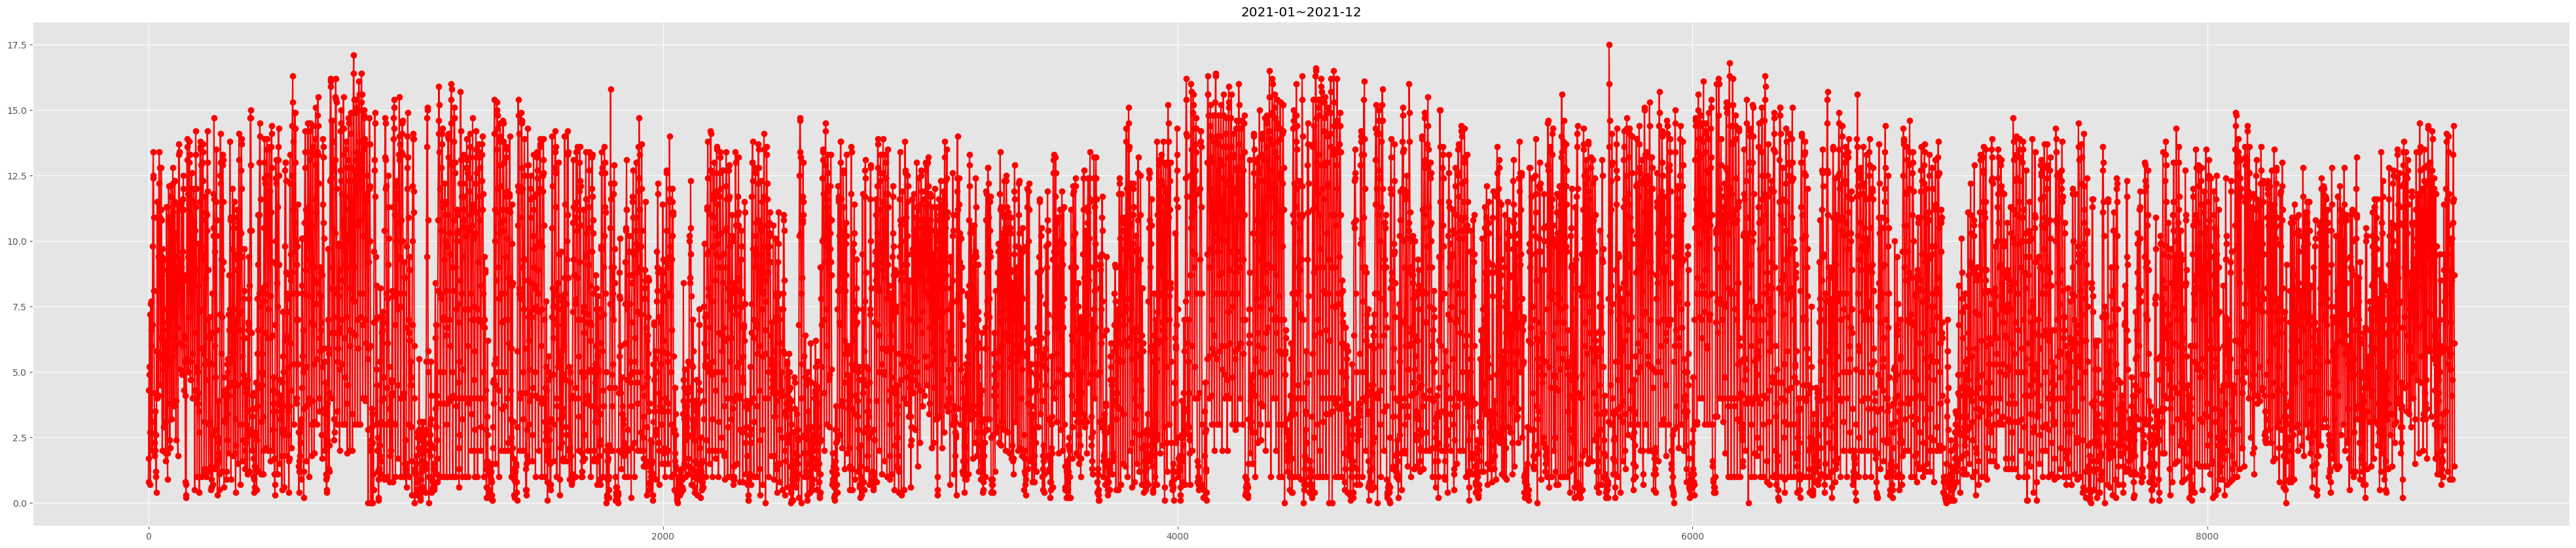

In [ ]:
## 전체 데이터 시각화
from numpy import concatenate
import matplotlib.pyplot as plt
day_df = []
for i in range(0, len(delet_last_time)) :
  n = len(delet_last_time[i])
  if n == 0:
    pass
    print(i)
  else:
   a = delet_last_time[i]['delta_dailyPower']
   day_df = concatenate([day_df , a],axis=0)
  #  day_df.append(a)

df_day = pd.DataFrame(day_df)
df_day.columns = ['delta_dailyPower']
print(len(df_day))
##시각화
plt.figure(figsize = (50, 10))
plt.plot(df_day, 'ro-')
plt.title("2021-01~2021-12")

In [ ]:
delet_last_time[0]

,dcA,기온(°C),3시간신적설(cm),지면온도(°C),일사(MJ/m2),acV,기온 QC플래그,5cm 지중온도(°C),이슬점온도(°C),지면온도 QC플래그,...,풍향(16방위),적설(cm),습도 QC플래그,증기압(hPa),운형(운형약어),capacity,강수량 QC플래그,30cm 지중온도(°C),delta_cumulativePower,delta_dailyPower
2019-01-01 09:00:00,1.320000,-1.377339,0.0,-1.539332,0.251893,382.4,-0.024061,-1.590831,-1.298773,-0.027215,...,1.006465,-0.078155,-0.068169,-1.064909,0.0,97.2,-0.450605,-1.574311,1.0,0.8
2019-01-01 10:00:00,1.720000,-1.313786,0.0,-1.519977,0.331235,380.8,-0.024061,-1.579677,-1.270048,-0.027215,...,1.308374,-0.078155,-0.068169,-1.053430,0.0,97.2,-0.450605,-1.599831,2.0,1.7
2019-01-01 11:00:00,6.800000,-1.165493,0.0,-1.297402,0.761950,395.0,-0.024061,-1.546214,-1.183874,-0.027215,...,1.157419,-0.078155,-0.068169,-1.018993,0.0,97.2,-0.450605,-1.574311,5.0,4.3
2019-01-01 12:00:00,6.540000,-1.207862,0.0,-1.249016,0.795954,391.0,-0.024061,-1.512751,-1.203024,-0.027215,...,1.006465,-0.078155,-0.068169,-1.030472,0.0,97.2,-0.450605,-1.587071,5.0,5.2
2019-01-01 13:00:00,6.900000,-1.186678,0.0,-1.036117,0.852627,390.5,-0.024061,-1.490443,-1.040250,-0.027215,...,1.006465,-0.078155,-0.068169,-0.961597,0.0,97.2,-0.450605,-1.574311,5.0,4.9
2019-01-01 14:00:00,7.800000,-1.144308,0.0,-0.881282,0.807288,395.0,-0.024061,-1.468134,-1.021100,-0.027215,...,1.157419,-0.078155,-0.068169,-0.950118,0.0,97.2,2.219238,-1.587071,7.0,7.2
2019-01-01 15:00:00,3.320000,-1.207862,0.0,-1.123212,0.444581,383.0,-0.024061,-1.434671,-1.097699,-0.027215,...,1.157419,-0.078155,-0.068169,-0.984555,0.0,97.2,-0.450605,-1.561551,3.0,2.7
2019-01-01 16:00:00,3.442857,-1.260824,0.0,-1.239338,0.263227,383.0,-0.024061,-1.412363,-1.126424,-0.027215,...,1.006465,-0.078155,-0.068169,-0.996034,0.0,97.2,2.219238,-1.574311,1.0,0.7


In [ ]:
delet_last_time[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2019-01-01 09:00:00 to 2019-01-01 16:00:00
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dcA                    8 non-null      float64
 1   기온(°C)                 8 non-null      float64
 2   3시간신적설(cm)             8 non-null      float64
 3   지면온도(°C)               8 non-null      float64
 4   일사(MJ/m2)              8 non-null      float64
 5   acV                    8 non-null      float64
 6   기온 QC플래그               8 non-null      float64
 7   5cm 지중온도(°C)           8 non-null      float64
 8   이슬점온도(°C)              8 non-null      float64
 9   지면온도 QC플래그             8 non-null      float64
 10  중하층운량(10분위)            8 non-null      float64
 11  전운량(10분위)              8 non-null      float64
 12  현상번호(국내식)              8 non-null      float64
 13  최저운고(100m )            8 non-null      float64
 14  dcKW                   

In [ ]:
from pandas import concat
## 전체 데이터 합치기 (변수 중요도 파악)
## 전체 데이터 시각화
from numpy import concatenate
from numpy import stack
import matplotlib.pyplot as plt
day_df1 = pd.DataFrame()
a = pd.DataFrame()
for i in range(0, len(delet_last_time)) :
  n = len(delet_last_time[i])
  if n == 0:
    pass
    print(i)
  else:
   a = delet_last_time[i]
  #  print(a)
   a = pd.DataFrame(a)
  #  print(type(a))
   day_df1 = concat([day_df1 , a])
   day_df1.drop(['delta_cumulativePower'], axis=1, inplace=True)

In [ ]:
selected_columns = day_df1
selected_columns

,dcA,기온(°C),3시간신적설(cm),지면온도(°C),일사(MJ/m2),acV,기온 QC플래그,5cm 지중온도(°C),이슬점온도(°C),지면온도 QC플래그,...,풍향 QC플래그,풍향(16방위),적설(cm),습도 QC플래그,증기압(hPa),운형(운형약어),capacity,강수량 QC플래그,30cm 지중온도(°C),delta_dailyPower
2019-01-01 09:00:00,1.320000,-1.377339,0.0,-1.539332,0.251893,382.400000,-0.024061,-1.590831,-1.298773,-0.027215,...,-0.017208,1.006465,-0.078155,-0.068169,-1.064909,0.0,97.2,-0.450605,-1.574311,0.8
2019-01-01 10:00:00,1.720000,-1.313786,0.0,-1.519977,0.331235,380.800000,-0.024061,-1.579677,-1.270048,-0.027215,...,-0.017208,1.308374,-0.078155,-0.068169,-1.053430,0.0,97.2,-0.450605,-1.599831,1.7
2019-01-01 11:00:00,6.800000,-1.165493,0.0,-1.297402,0.761950,395.000000,-0.024061,-1.546214,-1.183874,-0.027215,...,-0.017208,1.157419,-0.078155,-0.068169,-1.018993,0.0,97.2,-0.450605,-1.574311,4.3
2019-01-01 12:00:00,6.540000,-1.207862,0.0,-1.249016,0.795954,391.000000,-0.024061,-1.512751,-1.203024,-0.027215,...,-0.017208,1.006465,-0.078155,-0.068169,-1.030472,0.0,97.2,-0.450605,-1.587071,5.2
2019-01-01 13:00:00,6.900000,-1.186678,0.0,-1.036117,0.852627,390.500000,-0.024061,-1.490443,-1.040250,-0.027215,...,-0.017208,1.006465,-0.078155,-0.068169,-0.961597,0.0,97.2,-0.450605,-1.574311,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30 13:00:00,29.060000,-0.932462,0.0,-0.881282,2.156106,407.200000,-0.024061,-1.066580,-2.007319,-0.027215,...,-0.017208,1.006465,-0.078155,-0.068169,-1.271532,0.0,97.2,-0.450605,-1.306351,14.4
2022-01-30 14:00:00,26.520000,-0.911278,0.0,-0.803864,2.099433,408.200000,-0.024061,-1.044271,-2.179668,-0.027215,...,-0.017208,1.157419,-0.078155,-0.068169,-1.305969,0.0,97.2,-0.450605,-1.319111,11.6
2022-01-30 15:00:00,15.057143,-0.879501,0.0,-0.861927,1.748061,407.142857,-0.024061,-0.921574,-2.217968,-0.027215,...,-0.017208,1.006465,-0.078155,-0.068169,-1.317448,0.0,97.2,-0.450605,-1.319111,8.7
2022-01-30 16:00:00,15.000000,-0.879501,0.0,-0.900636,1.079319,405.000000,-0.024061,-1.033117,-2.217968,-0.027215,...,-0.017208,1.006465,-0.078155,-0.068169,-1.317448,0.0,97.2,-0.450605,-1.331871,6.1


In [ ]:
state = selected_columns.iloc[:,0:39]
action = selected_columns.iloc[:,39:41]
reward = selected_columns.iloc[:,41]

# one-hot-encoding
# action = action.values
# enc.fit(action)
# action = enc.transform(action).toarray()

state_original = selected_columns.iloc[:,0:1]
action_original = selected_columns.iloc[:,39:41]
reward_original = selected_columns.iloc[:,41]

state_original = state_original.values
action_original = action_original.values
reward_original = reward_original.values
reward_original= reward_original.reshape(len(reward_original),1)


state = state.values
action = action.values
reward = reward.values
reward= reward.reshape(len(reward),1)

print(state.shape)
print(action.shape)
print(reward.shape)

(8962, 39)
(8962, 2)
(8962, 1)


In [ ]:
reward

array([[0.8],
       [1.7],
       [4.3],
       ...,
       [8.7],
       [6.1],
       [1.4]])

In [ ]:
# Data split
state_action = np.concatenate([state,action], axis = 1)
from sklearn.model_selection import train_test_split
state_and_action, test_state_and_action, reward, test_reward = train_test_split(state_action, reward, test_size=0.3 )

# state = state_action[0:71,0:6]
# action = state_action[0:71,6:]
# reward = scaled2[0:71,]

# test_state = state_action[71:,0:6]
# test_action = state_action[71:,6:]
# test_reward = scaled2[71:,]


state = state_and_action[:,0:2]
action = state_and_action[:,2:]

test_state = test_state_and_action[:,0:2]
test_action = test_state_and_action[:,2:]

print(state.shape)
print(action.shape)
print(reward.shape)
print(test_state.shape)
print(test_action.shape)
print(test_reward.shape)

np.save("real_state.npy",state)
np.save("real_action.npy",action)
np.save("real_reward.npy",reward)

import os
print(os.getcwd())

(6273, 2)
(6273, 39)
(6273, 1)
(2689, 2)
(2689, 39)
(2689, 1)
/content


In [ ]:
reward

array([[ 1.7],
       [ 2.2],
       [ 2.1],
       ...,
       [ 1.1],
       [12.6],
       [ 0.6]])

In [ ]:
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F

class FunctionApproximator(nn.Module):
    def __init__(self, shape, sigmoid=False):                    #network를 구성하는 부분들을 초기화, super().__init__()는 pytorch가 역전파를 진행해야하는 변수를 인식하게 만들기 위해서 필요
        super(FunctionApproximator, self).__init__()
        self.layers = nn.Sequential()
        self.sigmoid = None
        if sigmoid:
          self.sigmoid = nn.Sigmoid()
        for i in range(len(shape)-1):
            self.layers.add_module(str(i)+"th layer",nn.Linear(shape[i],shape[i+1]))
            # self.layers.add_module(str(i)+"th layer",nn.Sigmoid())
            if(i != len(shape)-2):
                self.layers.add_module(str(i)+"th nonlinear",nn.ReLU())        #마지막 layer을 제외하고 relu를 이용해 비선형 함수를 추가해준다.
                # self.layers.add_module(str(i)+"th dropout",nn.Dropout(0.2))
                temp_layer = nn.Linear(shape[i],shape[i+1])
                nn.init.kaiming_normal_(temp_layer.weight)
                self.layers.add_module(str(i)+"th layer", temp_layer)
    #     self.layers.apply(self.inint_weights)

    # def inint_weights(self,m):
    #   if type(m) == nn.Linear:
    #     torch.nn.init.kaiming_normal_(m.weight)


    def forward(self, input):
      result = self.layers(input)
      if not self.sigmoid:
        return result
      return self.sigmoid(result)

In [ ]:
net_shape = [state_dim+num_action, (state_dim+num_action)*2,32,16,8,1]
losses = []
class RewardFunction():
    def __init__(self, netshape, learning_rate, state_dim, action_dim):
        self.network = FunctionApproximator(netshape)
        # self.optimizer = optim.SGD(self.network.parameters(), lr=learning_rate, momentum=0.9)
        self.optimizer = optim.Adam(self.network.parameters(), lr=learning_rate) #best
        # self.optimizer = optim.Adam(self.network.parameters(), lr=learning_rate, weight_decay=1e-3) #best
        # self.optimizer = optim.Adam(self.network.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
        # self.optimizer = optim.Adadelta(self.network.parameters(), lr=learning_rate, rho=0.9, eps=1e-06, weight_decay=0)
        # self.optimizer = optim.Adagrad(self.network.parameters(), lr=learning_rate, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
        # self.optimizer = optim.AdamW(self.network.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)

        # self.optimizer = optim.Adamax(self.network.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
        # self.optimizer = optim.ASGD(self.network.parameters(), lr=learning_rate, lambd=0.0001, alpha=0.75, t0=1000000.0, weight_decay=0)

        # self.optimizer = optim.RMSprop(self.network.parameters(), lr=learning_rate, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False) ##BEST
        # self.optimizer = optim.Rprop(self.network.parameters(), lr=learning_rate, etas=(0.5, 1.2), step_sizes=(1e-06, 50))
        # self.optimizer = optim.SGD(self.network.parameters(), lr=learning_rate, momentum=0, dampening=0, weight_decay=0, nesterov=False)



        self.load_data()
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.loss_func = nn.L1Loss()
    def load_data(self):                       #저장된 data를 불러오는 함수
        state = np.load("real_state.npy")
        action = np.load("real_action.npy")
        reward = np.load("real_reward.npy")
        state_action = np.concatenate([state,action], axis = 1)
        self.data = {"state_action": torch.tensor(state_action).float(), "reward":torch.tensor(reward).float()} #, pytorch에서 사용하기 위해 tensor자료형으로 저장하고, double->float로 형을 변환한다.


    def train(self, num_epoch):                   #학습을 위한 함수
        if self.data == None:
            self.load_data()
        for epoch in range(num_epoch):
            exp_rewards = self.network(self.data["state_action"])
            loss = F.mse_loss(exp_rewards, self.data["reward"])
            # loss = self.loss_func(exp_rewards, self.data["reward"])

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            if epoch%1000 == 0:
                 print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                 epoch, num_epoch-1, loss.item()
              ))
            losses.append(loss.item())

        torch.save(reward.network, "/content/drive/MyDrive/rewardfunction.model_save400000000000000000000000")

    # def generate_data(self, num_data):                                    #학습한 신경망을 바탕으로, data를 재생산하는 함수
    #     state = np.random.randint(action_range, size = (num_data,state_dim))
    #     action = np.random.randint(action_range,size = (num_data, num_action))
    #     state_action = torch.tensor(np.concatenate([state, action], axis = 1)).float()      #network에 대입할 수 있는 형식으로 변경
    #     reward = self.network(state_action).detach().numpy()
    #     np.save("state.npy",state)
    #     np.save("action.npy",action)
    #     np.save("reward.npy",reward)



def get_model():
    model = torch.load("/content/drive/MyDrive/rewardfunction.model_save400000000000000000000000")
    return model

In [ ]:
# if __name__ == '__main__':
#     reward = RewardFunction(net_shape,1e-2, 1, 3)
#     reward.train(10000)

## 단변량

### 민섭's

In [ ]:
##lstm데이터 생성
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
len(delet_last_time)

913

In [ ]:
le = 0
index = 0
for i in range(len(delet_last_time)) :
    # print(index, len(delet_last_time[i]))
    le += delet_last_time[i].shape[0]
    index += 1

print(le)

8962


In [ ]:
values = delet_last_time[0][['delta_dailyPower']].values
print(values), print(values.shape)

[[0.8]
 [1.7]
 [4.3]
 [5.2]
 [4.9]
 [7.2]
 [2.7]
 [0.7]]
(8, 1)


(None, None)

In [ ]:
values2 = pd.DataFrame()
for i in range(0, len(delet_last_time)) :
    values = delet_last_time[i][['delta_dailyPower']].values

    ##정규화
    # scaler = MinMaxScaler(feature_range=(0, 1))
    # scaled = scaler.fit_transform(norm)
    n_hours = 5
    n_features = 1
    # frame as supervised learning
    reframed = series_to_supervised(values, n_hours, 1)
    # print(reframed.shape),print(reframed.head())
    if i == 0 :

        values2 = reframed
    else :

        values2 = concatenate([values2 , reframed],axis=0)

In [ ]:
values2.shape

(4389, 6)

In [ ]:
# 데이터 정렬
# split into train and test sets
# values = reframed.values
n_train_hours = 2500
train = values2[:n_train_hours, :]
test = values2[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
print(values2.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2500, 5) 2500 (2500,)
(4389, 6)
(2500, 5, 1) (2500,) (1889, 5, 1) (1889,)


In [ ]:
#merging data
x = concatenate([train_X, test_X],axis=0)
y = concatenate([train_y, test_y],axis=0)
print(x.shape)
print(y.shape)

(4389, 5, 1)
(4389,)


In [ ]:
#데이터 분할
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta


from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=1004)
print(train_x.shape)
print(test_x.shape)
print(test_y.shape)
print(train_y.shape)
# one_hot_vec_size = train_y.shape[1]
# print("one hot encoding vector size is ", one_hot_vec_size)

(3072, 5, 1)
(1317, 5, 1)
(1317,)
(3072,)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
n_classes = 1

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [ ]:
input_shape = train_x.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0,
    dropout=0,
)

model.compile(optimizer=RMSprop(learning_rate=0.01), loss='mae', metrics=['mae'])
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=300, restore_best_weights=True), tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factort=0.1, patience=100, min_lr=0.0001)]

history = model.fit(
    train_x,
    train_y,
    validation_split=0.2,
    epochs=500,
    batch_size=256,
    callbacks=callbacks,
)

model.evaluate(test_x, test_y, verbose=1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 5, 1)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 5, 1)           │              2 │ input_layer[0][0]      │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 5, 1)           │          7,169 │ layer_normalization[0… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 5, 1)           │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 5, 1)           │              0 │ dropout_1[0][0],       │
│                           │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 5, 1)           │              2 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 5, 4)           │              8 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 5, 4)           │              0 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 5, 1)           │              5 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 5, 1)           │              0 │ conv1d_1[0][0],        │
│                           │                        │                │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 5, 1)           │              2 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 5, 1)           │          7,169 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 5, 1)           │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 5, 1)           │              0 │ dropout_4[0][0],       │
│                           │                        │                │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 5, 1)           │              2 │ add_2[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 29,641 (115.79 KB)

 Trainable params: 29,641 (115.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 722ms/step - loss: 4.9758 - mae: 4.9758 - val_loss: 4.1011 - val_mae: 4.1011 - learning_rate: 0.0100
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 2.5906 - mae: 2.5906 - val_loss: 1.9721 - val_mae: 1.9721 - learning_rate: 0.0100
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.9091 - mae: 1.9091 - val_loss: 1.8842 - val_mae: 1.8842 - learning_rate: 0.0100
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.9326 - mae: 1.9326 - val_loss: 2.3235 - val_mae: 2.3235 - learning_rate: 0.0100
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.9671 - mae: 1.9671 - val_loss: 1.5169 - val_mae: 1.5169 - learning_rate: 0.0100
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.6973 - mae: 1.6973 - val_loss: 1.5724 - val_mae: 1.5724 - learning_rate: 0.0100
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.6765 - mae: 1.6765 - val_loss: 1.6018 - val_mae: 1.6018 - learning_rate: 0.0100
Epoc

[1.2240766286849976, 1.2240766286849976]

In [ ]:
# #model build
# from math import sqrt
# from numpy import concatenate
# from matplotlib import pyplot
# from pandas import read_csv
# from pandas import DataFrame
# from pandas import concat
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_squared_error
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# import tensorflow as tf
# from tensorflow.keras import optimizers
# #10분 뒤의 미세먼지 농도 예측 모델
# from keras import layers

# from keras.callbacks import EarlyStopping
# import keras
# from keras.layers import Dense, Dropout

# # 2. 모델 구성
# model = Sequential()
# model.add(LSTM(128, activation = 'tanh', input_shape=(train_x.shape[1], train_x.shape[2])))
# # DENSE와 사용법 동일하나 input_shape=(열, 몇개씩잘라작업)
# model.add(Dense(64))
# model.add(Dense(32))
# model.add(Dense(16))
# model.add(Dense(8))
# model.add(Dense(1))

# model.summary()

# # 3. 실행
# model.compile(optimizer='RMsprop', loss='mae')
# history = model.fit(train_x, train_y, epochs=200, batch_size = 128, verbose=2, validation_split=0.2, shuffle=True  )



# # history = model.fit(train7_x, train7_y, epochs=20, batch_size=256, validation_data=(val7_x, val7_y), verbose=2, shuffle=False  )

In [ ]:
# #모델 고도화
# from math import sqrt
# from numpy import concatenate
# from matplotlib import pyplot
# from pandas import read_csv
# from pandas import DataFrame
# from pandas import concat
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_squared_error
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# import tensorflow as tf
# from keras.layers import BatchNormalization
# from tensorflow.keras import optimizers
# from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# #10분 뒤의 미세먼지 농도 예측 모델
# from keras import layers

# from keras.callbacks import EarlyStopping
# import keras
# from keras.layers import Dense, Dropout

# # 2. 모델 구성
# model = Sequential()
# model.add(LSTM(128, activation = 'tanh', input_shape=(train_x.shape[1], train_x.shape[2])))
# # DENSE와 사용법 동일하나 input_shape=(열, 몇개씩잘라작업)
# model.add(Dense(64))
# model.add(BatchNormalization())
# model.add(Dense(32))
# model.add(BatchNormalization())
# model.add(Dense(16))
# model.add(BatchNormalization())
# model.add(Dense(8))
# model.add(BatchNormalization())
# model.add(Dense(1))

# model.summary()

# # 3. 실행
# # model.compile(optimizer='Adam', loss='mae')
# model.compile(loss='mse', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0))
# # history = model.fit(train_x, train_y, epochs=200, batch_size = 128, verbose=2, validation_split=0.2, shuffle=True  )

# # 4. 모델 학습시키기 : 이 부분의 코드가 앞선 예제와 달라집니다.
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(patience=20,monitor="val_loss",verbose=1)
# reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience=5, factor=0.2, verbose=2, min_lr=1e-5)
# # early_stopping = EarlyStopping(patience = 100)
# history = model.fit(train_x, train_y,
#                  epochs = 3000, batch_size = 128,  shuffle=False,
#                  validation_split=0.2,
#                  callbacks=[early_stopping, reduce_lr])


# # history = model.fit(train7_x, train7_y, epochs=20, batch_size=256, validation_data=(val7_x, val7_y), verbose=2, shuffle=False  )

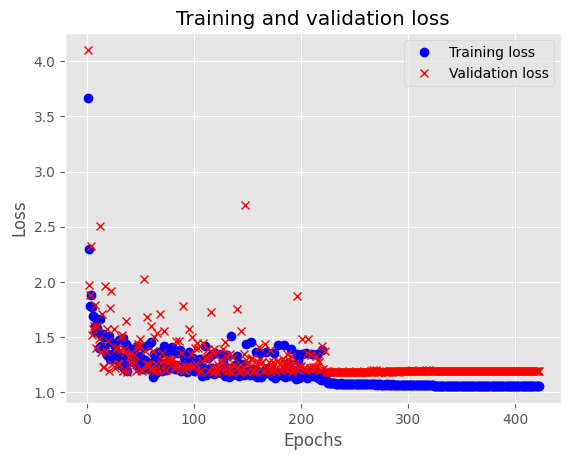

In [ ]:
#########학습 과정
import matplotlib.pyplot as plt
# plot history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'rx', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#########30분후 예측 모델
# make a prediction
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], n_hours*n_features))
# invert scaling for forecast
# inv_yhat = concatenate((yhat, x[:, -4:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((y, x[:, -4:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(test_y , yhat))
print('Test RMSE: %.3f' % rmse)

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
Test RMSE: 1.751


In [ ]:
  # MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, yhat)

1.2240765298236564

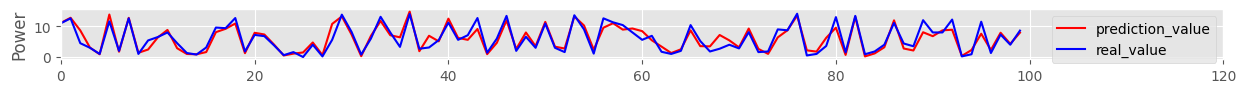

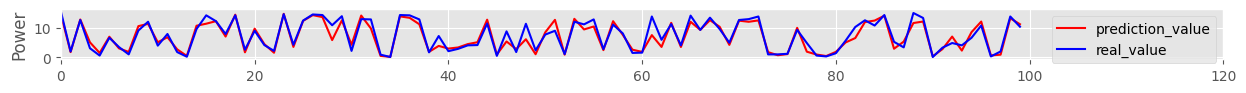

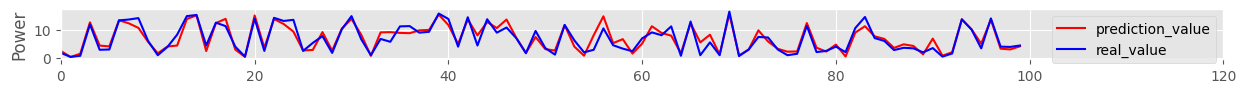

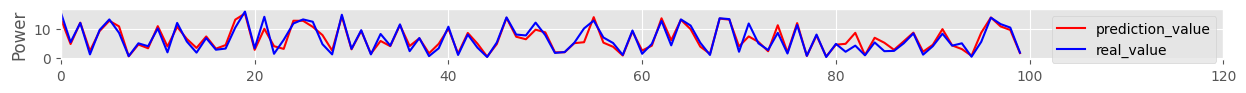

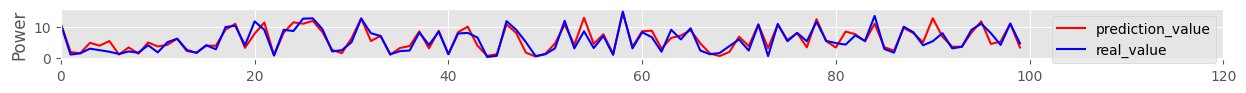

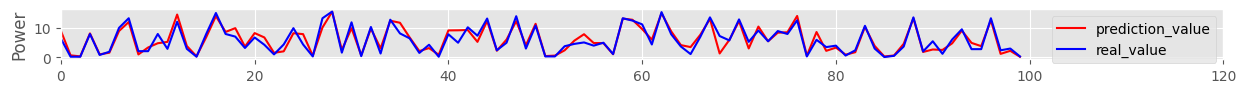

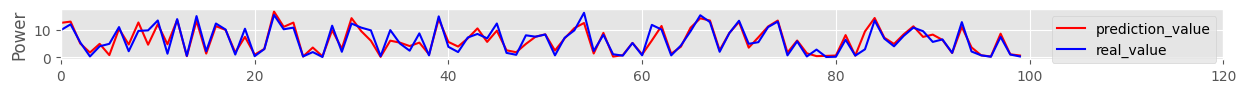

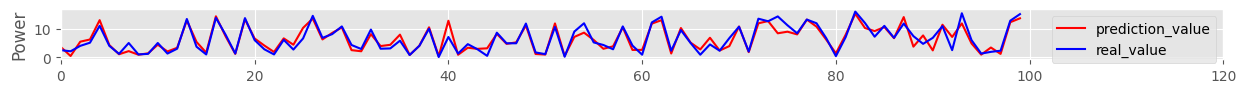

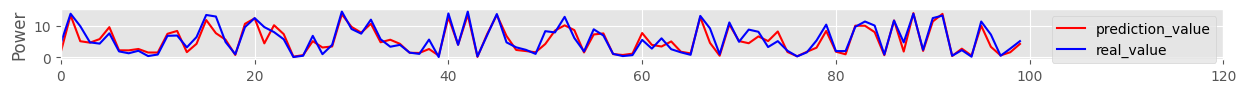

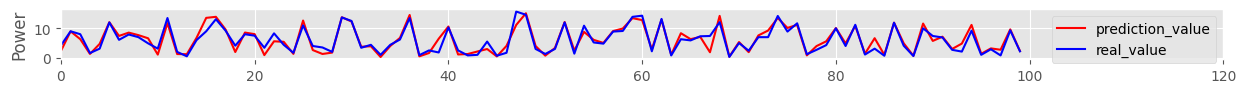

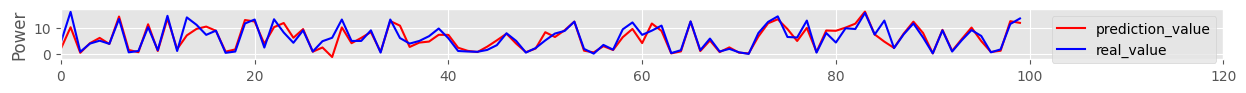

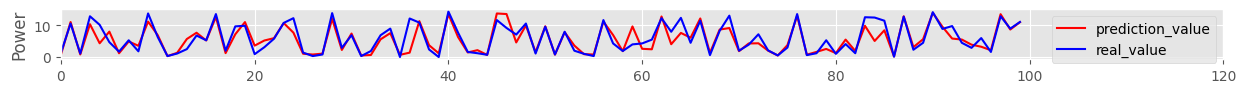

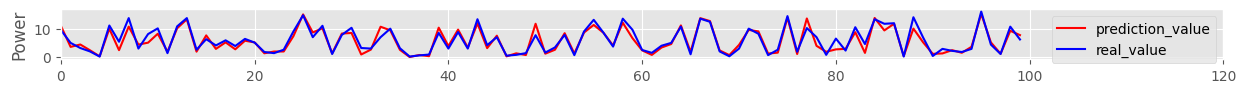

6.266742596810934


In [ ]:
#########30분후 예측 모델 일부분
# for i in range(0, len(delet_last_time)) :
z = 0
for i in range(0, round(len(yhat)/100)) :

  plt.figure(figsize = (15, 10))

  plt.subplot(round(len(yhat)/100), 1, i+1)
  plt.xlim([0, 120])
  pyplot.plot(yhat[z:z+100],'r', label='prediction_value')
  pyplot.plot(test_y[z:z+100],'b', label='real_value')
  z = z+100

  plt.ylabel('Power')
  # plt.text(4,3, 'red = prediction_value')
  # plt.text(4,5, 'blue = real_value')
  plt.legend(loc='upper right')
  pyplot.show()
print(np.mean(test_y))

In [ ]:
# 상관관계 계수를 계산하기 위한 데이터프레임 변경
import pandas as pd
y1 = pd.DataFrame(test_y)
y2 = pd.DataFrame(yhat)
print(y1)
y_result = pd.concat([y1,y2],axis=1)
print(y_result)

         0
0     11.0
1     12.6
2      4.5
3      3.0
4      1.0
...    ...
1312   9.8
1313  10.8
1314   7.5
1315  12.4
1316   8.7

[1317 rows x 1 columns]
         0          0
0     11.0  11.126340
1     12.6  12.778355
2      4.5   8.658433
3      3.0   3.070007
4      1.0   0.890350
...    ...        ...
1312   9.8   4.576752
1313  10.8   9.842694
1314   7.5   4.618694
1315  12.4  12.801993
1316   8.7   9.079976

[1317 rows x 2 columns]


In [ ]:
# 예측값과 실제값의 상관계수 계산
corr = y_result.corr(method = 'pearson')
print(corr)

          0         0
0  1.000000  0.922462
0  0.922462  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

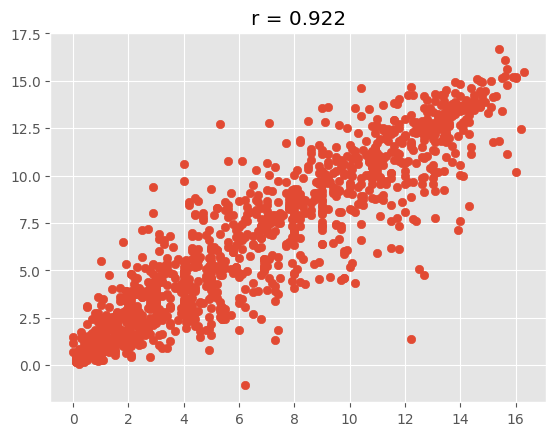

In [ ]:
plt.figure()
plt.title('r = {}'.format(round(corr.iloc[0, 1],3)))
plt.scatter(test_y,yhat)
plt.show

## 다변량

In [ ]:
climate.columns

Index(['기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그', '풍속(m/s)', '풍속 QC플래그',
       '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)', '해면기압 QC플래그', '일조(hr)',
       '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)', '3시간신적설(cm)',
       '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)',
       '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)',
       '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

In [ ]:
daily_data = []
'''
'delta_dailyPower', '일사(MJ/m2)', '10cm 지중온도(°C)'
'''

for idx, daily in enumerate(delet_last_time) :
    data = daily[['delta_dailyPower', '일사(MJ/m2)', '10cm 지중온도(°C)','풍속(m/s)','전운량(10분위)','일조(hr)']]
    daily_data.append(data)

In [ ]:
# daily_data = []

# '''
# 'delta_dailyPower', '이슬점온도(°C)', '시정(10m)', '10cm 지중온도(°C)', '20cm 지중온도(°C)','일조(hr)',
#       '일사(MJ/m2)', '기온(°C)', '현지기압(hPa)','5cm 지중온도(°C)','풍속(m/s)','습도(%)', '중하층운량(10분위)',
#       '강수량(mm)', '30cm 지중온도(°C)', '최저운고(100m )', '증기압(hPa)','지면온도(°C)','전운량(10분위)', '해면기압(hPa)',
#       '풍향(16방위)',
# '''

# for idx, daily in enumerate(delet_last_time) :
#     data = daily[['delta_dailyPower', '이슬점온도(°C)', '시정(10m)', '10cm 지중온도(°C)', '20cm 지중온도(°C)','일조(hr)',
#       '일사(MJ/m2)', '기온(°C)', '현지기압(hPa)','5cm 지중온도(°C)','풍속(m/s)','습도(%)', '중하층운량(10분위)',
#       '강수량(mm)', '30cm 지중온도(°C)', '최저운고(100m )', '증기압(hPa)','지면온도(°C)','전운량(10분위)', '해면기압(hPa)',
#       '풍향(16방위)']]
#     daily_data.append(data)

In [ ]:
# daily_data = []
# '''
# 'delta_dailyPower',  '일조(hr)', '일사(MJ/m2)', '5cm 지중온도(°C)'
# '''

# for idx, daily in enumerate(delet_last_time) :
#     data = daily[['delta_dailyPower',  '일조(hr)', '일사(MJ/m2)', '5cm 지중온도(°C)']]
#     daily_data.append(data)

In [ ]:
# daily_data = []
# '''
# 'delta_dailyPower', '기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그', '풍속(m/s)', '풍속 QC플래그',
#        '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)',
#        '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)', '해면기압 QC플래그', '일조(hr)',
#        '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)', '3시간신적설(cm)',
#        '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)',
#        '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)',
#        '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)'
# '''
# for idx, daily in enumerate(delet_last_time) :
#     data = daily[['delta_dailyPower', '기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그', '풍속(m/s)', '풍속 QC플래그',
#        '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)',
#        '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)', '해면기압 QC플래그', '일조(hr)',
#        '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)', '3시간신적설(cm)',
#        '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)',
#        '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)',
#        '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']]
#     daily_data.append(data)

In [ ]:
data

,delta_dailyPower,일사(MJ/m2),10cm 지중온도(°C),풍속(m/s),전운량(10분위),일조(hr)
2022-01-30 09:00:00,4.7,-0.178822,-1.398606,0.773505,-0.364149,1.620916
2022-01-30 10:00:00,10.7,0.829958,-1.387311,0.891011,0.147911,1.870770
2022-01-30 11:00:00,11.5,1.374019,-1.342132,1.243529,-0.108119,1.870770
2022-01-30 12:00:00,13.3,1.487365,-1.274362,0.949764,0.147911,1.870770
2022-01-30 13:00:00,14.4,2.156106,-1.240478,0.832258,-0.364149,1.870770
2022-01-30 14:00:00,11.6,2.099433,-1.206593,1.067270,-1.132239,1.870770
2022-01-30 15:00:00,8.7,1.748061,-1.150118,1.419788,-1.388269,1.870770
2022-01-30 16:00:00,6.1,1.079319,-1.138823,1.067270,0.403941,1.870770
2022-01-30 17:00:00,1.4,0.319900,-1.138823,0.303481,-0.620179,1.620916


In [ ]:
le = 0
index = 0
for i in range(len(daily_data)) :
    print(index, len(daily_data[i]))
    le += daily_data[i].shape[0]
    index += 1

print(le)

0 8
1 8
2 8
3 8
4 7
5 8
6 8
7 5
8 8
9 8
10 8
11 8
12 8
13 8
14 8
15 8
16 8
17 8
18 8
19 8
20 8
21 8
22 9
23 9
24 9
25 9
26 9
27 9
28 9
29 8
30 8
31 9
32 9
33 8
34 9
35 9
36 9
37 9
38 9
39 9
40 9
41 9
42 9
43 9
44 9
45 9
46 9
47 9
48 9
49 9
50 9
51 9
52 9
53 9
54 9
55 9
56 9
57 9
58 9
59 9
60 9
61 9
62 9
63 9
64 9
65 10
66 10
67 10
68 9
69 10
70 10
71 10
72 10
73 10
74 10
75 10
76 10
77 10
78 9
79 10
80 10
81 10
82 10
83 10
84 10
85 10
86 10
87 10
88 10
89 10
90 10
91 10
92 10
93 10
94 11
95 11
96 10
97 10
98 10
99 10
100 11
101 11
102 11
103 11
104 11
105 10
106 11
107 11
108 10
109 11
110 11
111 11
112 10
113 11
114 11
115 11
116 12
117 11
118 10
119 12
120 12
121 12
122 12
123 12
124 12
125 12
126 12
127 12
128 12
129 12
130 12
131 12
132 12
133 12
134 12
135 11
136 11
137 12
138 12
139 12
140 12
141 12
142 12
143 12
144 12
145 11
146 12
147 12
148 12
149 12
150 12
151 12
152 12
153 12
154 12
155 11
156 12
157 12
158 12
159 12
160 12
161 12
162 12
163 12
164 12
165 12
166 12
167 12
1

In [ ]:
##lstm데이터 생성
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
df_values = pd.DataFrame()

for idx, d in enumerate(daily_data) :
    values = d.values
    dataset = d

    # specify the number of lag hours
    n_hours = 5
    n_features = len(d.columns)
    # frame as supervised learning
    reframed = series_to_supervised(values, n_hours, 1)
    # print(reframed.shape),print(reframed.head()

    df_values = pd.concat([df_values, reframed], axis = 0)

In [ ]:
df_values.shape

(4389, 36)

In [ ]:
len(d.columns)

6

In [ ]:
df_values

,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var5(t-5),var6(t-5),var1(t-4),var2(t-4),var3(t-4),var4(t-4),...,var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
5,0.8,0.251893,-1.590619,0.127222,1.172031,-0.627769,1.7,0.331235,-1.601914,-0.342802,...,-1.545440,1.654800,1.172031,-0.128061,7.2,0.807288,-1.534145,0.538493,0.916001,0.621501
6,1.7,0.331235,-1.601914,-0.342802,1.172031,-0.627769,4.3,0.761950,-1.568030,0.773505,...,-1.534145,0.538493,0.916001,0.621501,2.7,0.444581,-1.511555,1.654800,1.172031,-0.377915
7,4.3,0.761950,-1.568030,0.773505,0.916001,-0.377915,5.2,0.795954,-1.601914,1.654800,...,-1.511555,1.654800,1.172031,-0.377915,0.7,0.263227,-1.466376,1.361035,1.172031,-0.377915
5,2.7,0.240558,-1.534145,-1.224097,0.916001,-0.627769,7.6,0.569262,-1.500260,-0.812826,...,-1.319542,1.831060,0.916001,0.621501,3.1,1.101988,-1.240478,0.773505,1.172031,0.621501
6,7.6,0.569262,-1.500260,-0.812826,0.659971,-0.377915,6.6,1.385353,-1.455081,0.538493,...,-1.240478,0.773505,1.172031,0.621501,3.1,0.818623,-1.229183,1.067270,0.659971,0.121793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,8.9,1.011311,-1.274362,1.008517,0.403941,1.371062,9.9,1.204000,-1.229183,0.303481,...,-1.138823,0.479740,-0.108119,1.870770,0.9,0.115877,-1.138823,0.420987,-0.364149,1.620916
5,4.7,-0.178822,-1.398606,0.773505,-0.364149,1.620916,10.7,0.829958,-1.387311,0.891011,...,-1.240478,0.832258,-0.364149,1.870770,11.6,2.099433,-1.206593,1.067270,-1.132239,1.870770
6,10.7,0.829958,-1.387311,0.891011,0.147911,1.870770,11.5,1.374019,-1.342132,1.243529,...,-1.206593,1.067270,-1.132239,1.870770,8.7,1.748061,-1.150118,1.419788,-1.388269,1.870770
7,11.5,1.374019,-1.342132,1.243529,-0.108119,1.870770,13.3,1.487365,-1.274362,0.949764,...,-1.150118,1.419788,-1.388269,1.870770,6.1,1.079319,-1.138823,1.067270,0.403941,1.870770


In [ ]:
#이전24시간으로 1시간후 예측
# split into train and test sets
values = df_values.values
n_train_hours = 5
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
# print(values.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(5, 30) 5 (5,)
(5, 5, 6) (5,) (4384, 5, 6) (4384,)


In [ ]:
train_X

array([[[ 0.8       ,  0.25189259, -1.5906194 ,  0.12722211,
          1.17203087, -0.62776907],
        [ 1.7       ,  0.33123484, -1.6019143 , -0.34280201,
          1.17203087, -0.62776907],
        [ 4.3       ,  0.76194989, -1.5680296 ,  0.77350527,
          0.91600084, -0.37791515],
        [ 5.2       ,  0.79595371, -1.6019143 ,  1.6548005 ,
          0.91600084, -0.12806123],
        [ 4.9       ,  0.85262674, -1.5454398 ,  1.6548005 ,
          1.17203087, -0.12806123]],

       [[ 1.7       ,  0.33123484, -1.6019143 , -0.34280201,
          1.17203087, -0.62776907],
        [ 4.3       ,  0.76194989, -1.5680296 ,  0.77350527,
          0.91600084, -0.37791515],
        [ 5.2       ,  0.79595371, -1.6019143 ,  1.6548005 ,
          0.91600084, -0.12806123],
        [ 4.9       ,  0.85262674, -1.5454398 ,  1.6548005 ,
          1.17203087, -0.12806123],
        [ 7.2       ,  0.80728831, -1.5341449 ,  0.53849321,
          0.91600084,  0.62150053]],

       [[ 4.3       ,  0.7

In [ ]:
train_y

array([7.2, 2.7, 0.7, 3.1, 3.1])

In [ ]:
#merging data
x = concatenate([train_X, test_X],axis=0)
y = concatenate([train_y, test_y],axis=0)
print(x.shape)
print(y.shape)

(4389, 5, 6)
(4389,)


In [ ]:
#데이터 분할
from sklearn.model_selection import train_test_split
train_x1, test_x1, train_y1, test_y1 = train_test_split(x, y, test_size=0.3, shuffle=False, random_state=1004)
print(train_x1.shape)
print(test_x1.shape)
print(test_y1.shape)
print(train_y1.shape)
# one_hot_vec_size = train_y.shape[1]
# print("one hot encoding vector size is ", one_hot_vec_size)

(3072, 5, 6)
(1317, 5, 6)
(1317,)
(3072,)


In [ ]:
# #1시간 이전 예측 모델
# from keras.models import Sequential
# from keras.layers import Dense, SimpleRNN, GRU, LSTM
# # from keras.optimizers import SGD
# from keras import layers
# from keras.layers import Dropout
# # from keras.optimizers import RMSprop
# from tensorflow.keras import optimizers
# from tensorflow.keras import regularizers
# from keras.layers import BatchNormalization
# import keras
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.optimizers import Adagrad
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers import Adadelta
# # from keras.optimizers import SGD
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
# from tensorflow.keras.optimizers import SGD


# model1 = Sequential()

# model1.add(LSTM(32, activation = 'tanh', input_shape=(train_x1.shape[1], train_x1.shape[2]), return_sequences=True))
# model1.add(LSTM(16, activation = 'tanh', return_sequences=True))
# # model.add(BatchNormalization())
# model1.add(LSTM(16, activation = 'tanh', return_sequences=True))
# # model.add(BatchNormalization())
# model1.add(LSTM(8, activation = 'tanh', return_sequences=True))
# # model.add(BatchNormalization())
# model1.add(LSTM(8, activation = 'tanh', return_sequences=True))
# # model.add(BatchNormalization())
# model1.add(LSTM(8))
# # model.add(BatchNormalization())
# # return_sequence를 쓰면 dimension이 한개 추가 되므로 다음 Dense Layer의 인풋에 3 dim이 들어가게 되므로 안씀
# # LSTM 두개를 엮을 때
# model1.add(Dense(5))
# model1.add(BatchNormalization())
# model1.add(Dense(1))




# # model = Sequential()
# # model.add(LSTM(128, activation = 'tanh', input_shape=(train_x1.shape[1], train_x1.shape[2])))
# # # DENSE와 사용법 동일하나 input_shape=(열, 몇개씩잘라작업)
# # model.add(Dense(64))
# # model.add(BatchNormalization())
# # model.add(Dense(32))
# # model.add(BatchNormalization())
# # model.add(Dense(16))
# # model.add(BatchNormalization())
# # model.add(Dense(8))
# # model.add(BatchNormalization())
# # model.add(Dense(1))

# # model = Sequential()
# # # model.add(LSTM(128, batch_input_shape=(1, train_x1.shape[1], train_x1.shape[2]), stateful=True))
# # model.add(LSTM(64, activation = 'tanh', batch_input_shape=(1, train_x.shape1[1], train_x1.shape[2]), stateful=True))
# # # model.add(BatchNormalization())
# # # model.add(Dropout(0.2))
# # # DENSE와 사용법 동일하나 input_shape=(열, 몇개씩잘라작업)
# # model.add(Dense(32,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
# # # model.add(Dropout(0.2))
# # model.add(Dense(16,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
# # # model.add(Dropout(0.2))
# # model.add(Dense(8,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
# # # model.add(Dropout(0.2))
# # model.add(Dense(4,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
# # model.add(Dense(1))
# # model.summary()

# # 3. 실행
# # model.compile(optimizer='adam', loss='mae')
# # model.compile(optimizer='RMsprop', loss='mae')
# # model.compile(loss='mse', optimizer=SGD(lr=0.001, momentum=0.9))
# # model.compile(loss='mse', optimizer=Adagrad(lr=0.01, epsilon=1e-6))
# # model.compile(loss='mse', optimizer=Adadelta(rho=0.95))
# # model.compile(loss='mse', optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0))
# model1.compile(loss='mse', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0))

# # history = model.fit(train_x1, train_y1, epochs = 70, batch_size = 128, verbose=2, validation_split=0.2, shuffle=True  )

# # 4. 모델 학습시키기 : 이 부분의 코드가 앞선 예제와 달라집니다.
# from keras.callbacks import EarlyStopping
# # checkpointer = ModelCheckpoint(save_best_only=True,verbose=1)
# early_stopping = EarlyStopping(patience=20,monitor="val_loss", mode='auto', verbose=1)
# reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience=5, factor=0.2, verbose=2, min_lr=1e-5)
# # early_stopping = EarlyStopping(patience = 100)
# history = model1.fit(train_x1, train_y1,
#                  epochs = 3000, batch_size = 64,  shuffle=False,
#                  validation_split=0.2,
#                  callbacks=[ early_stopping, reduce_lr])
# # num_epochs = 100

# # for epoch_idx in range(num_epochs):
# #     print ('epochs : ' + str(epoch_idx) )
# #     history = model.fit(train_x1, train_y1, epochs=1, batch_size=1, verbose=2, shuffle=False,validation_split=0.2, callbacks=[early_stopping, reduce_lr]) # 50 is X.shape[0]
# #     model.reset_states()

In [ ]:
# # relu
# #1시간 이전 예측 모델
# from keras import layers
# # from keras.optimizers import RMSprop
# from tensorflow.keras import optimizers
# import keras
# from tensorflow.keras.callbacks import ReduceLROnPlateau

# model = Sequential()
# model.add(LSTM(128, activation = 'tanh', input_shape=(train_x1.shape[1], train_x1.shape[2])))
# # DENSE와 사용법 동일하나 input_shape=(열, 몇개씩잘라작업)
# model.add(Dense(64))
# model.add(Dense(32))
# model.add(Dense(16))
# model.add(Dense(8))
# model.add(Dense(1))

# model.summary()

# # 3. 실행
# model.compile(optimizer='adam', loss='mse')
# # model.compile(loss='mse', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0))
# history = model.fit(train_x1, train_y1, epochs = 100, batch_size = 128, verbose=2, validation_split=0.2, shuffle= False  )

# # # 4. 모델 학습시키기 : 이 부분의 코드가 앞선 예제와 달라집니다.
# # from keras.callbacks import EarlyStopping
# # early_stopping = EarlyStopping(patience=100,monitor="val_loss",verbose=1)
# # reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience=100, factor=0.2, verbose=2, min_lr=1e-5)
# # # early_stopping = EarlyStopping(patience = 100)
# # history = model.fit(train_x1, train_y1,
# #                  epochs = 3000, batch_size = 128,
# #                  validation_split=0.2,
# #                  callbacks=[early_stopping, reduce_lr])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
n_classes = 1

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [ ]:
input_shape = train_x1.shape[1:]

model = build_model(
    input_shape,
    head_size=128,  # Reduce from 256 to 128
    num_heads=2,  # Keep the same (minimal impact on memory)
    ff_dim=2,  # Reduce from 4 to 2 (smaller feed-forward network)
    num_transformer_blocks=2,  # Reduce from 4 to 2 (fewer transformer layers)
    mlp_units=[64],  # Reduce from 128 to 64
    mlp_dropout=0.1,  # Add slight dropout to stabilize
    dropout=0.1,  # Reduce dropout (less aggressive)
)


model.compile(optimizer=RMSprop(learning_rate=0.01), loss='mae', metrics=['mae'])
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True), tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factort=0.1, patience=100, min_lr=0.0001)]

history = model.fit(
    train_x1,
    train_y1,
    validation_split=0.2,
    shuffle=False,
    epochs=500,
    batch_size=256,
    callbacks=callbacks,
)

model.evaluate(test_x1, test_y1, verbose=1)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 5, 6)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_12    │ (None, 5, 6)           │             12 │ input_layer_2[0][0]    │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_6    │ (None, 5, 6)           │          6,918 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_21 (Dropout)      │ (None, 5, 6)           │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_12 (Add)              │ (None, 5, 6)           │              0 │ dropout_21[0][0],      │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_13    │ (None, 5, 6)           │             12 │ add_12[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_12 (Conv1D)        │ (None, 5, 2)           │             14 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_22 (Dropout)      │ (None, 5, 2)           │              0 │ conv1d_12[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_13 (Conv1D)        │ (None, 5, 6)           │             18 │ dropout_22[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_13 (Add)              │ (None, 5, 6)           │              0 │ conv1d_13[0][0],       │
│                           │                        │                │ add_12[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_14    │ (None, 5, 6)           │             12 │ add_13[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_7    │ (None, 5, 6)           │          6,918 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_24 (Dropout)      │ (None, 5, 6)           │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_14 (Add)              │ (None, 5, 6)           │              0 │ dropout_24[0][0],      │
│                           │                        │                │ add_13[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_15    │ (None, 5, 6)           │             12 │ add_14[0][0]           │
│ (LayerNormalization) 

 Total params: 14,397 (56.24 KB)

 Trainable params: 14,397 (56.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - loss: 4.1957 - mae: 4.1957 - val_loss: 2.5994 - val_mae: 2.5994 - learning_rate: 0.0100
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.6299 - mae: 2.6299 - val_loss: 1.5005 - val_mae: 1.5005 - learning_rate: 0.0100
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.4155 - mae: 2.4155 - val_loss: 1.4520 - val_mae: 1.4520 - learning_rate: 0.0100
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.0844 - mae: 2.0844 - val_loss: 2.2776 - val_mae: 2.2776 - learning_rate: 0.0100
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.0996 - mae: 2.0996 - val_loss: 1.3717 - val_mae: 1.3717 - learning_rate: 0.0100
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.8083 - mae: 1.8083 - val_loss: 1.6970 - val_mae: 1.6970 - learning_rate: 0.0100
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.9078 - mae: 1.9078 - val_loss: 1.1582 - val_mae: 1.1582 - learning_rate: 0.0100
Epoch 8

[1.1325201988220215, 1.1325201988220215]

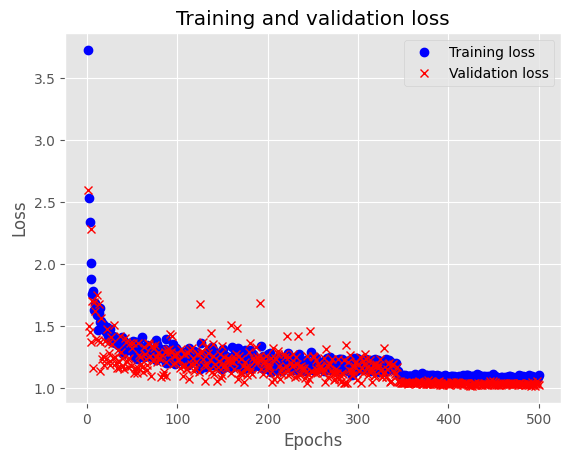

In [ ]:
#########학습 과정
import matplotlib.pyplot as plt

# plot history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'rx', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#########30분후 예측 모델
# make a prediction
yhat = model.predict(test_x1)
# test_x = test_x.reshape((test_x.shape[0], n_hours*n_features))
# invert scaling for forecast
# inv_yhat = concatenate((yhat, x[:, -4:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y1 = test_y1.reshape((len(test_y1), 1))
# inv_y = concatenate((y, x[:, -4:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(test_y1 , yhat))
print('Test RMSE: %.3f' % rmse)

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
Test RMSE: 1.619


In [ ]:
  # MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y1, yhat)

1.1325202888399701

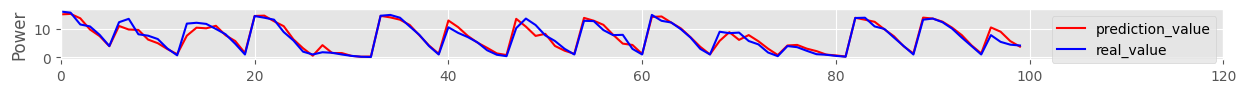

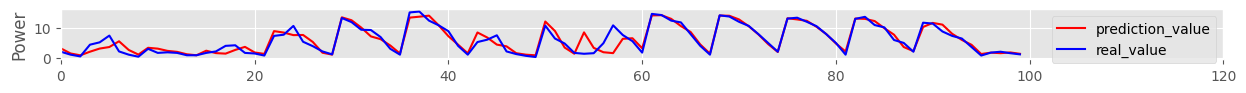

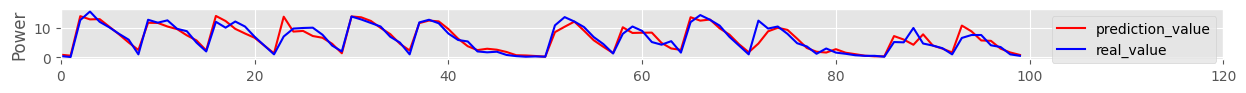

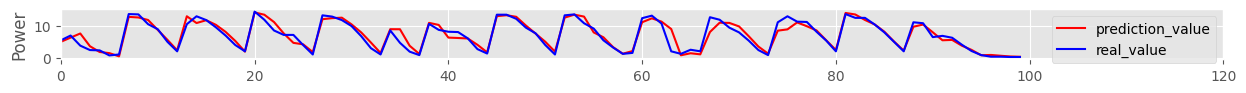

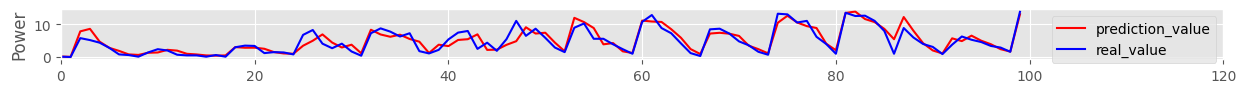

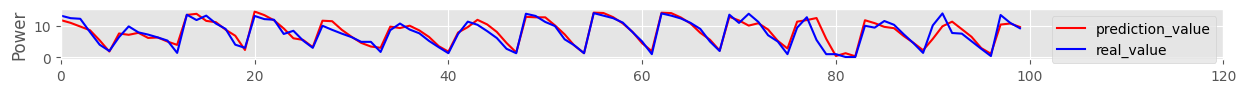

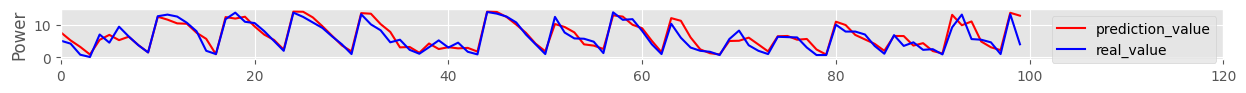

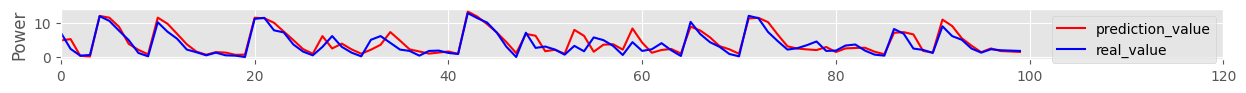

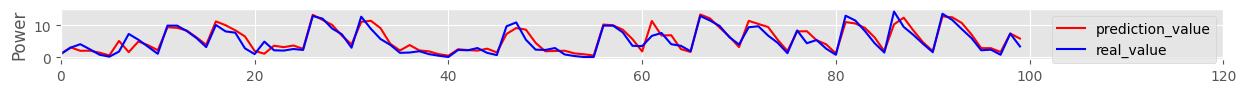

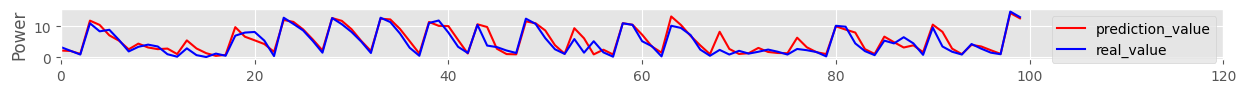

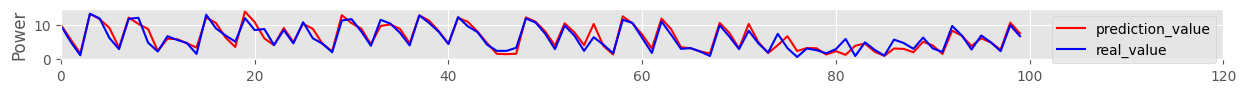

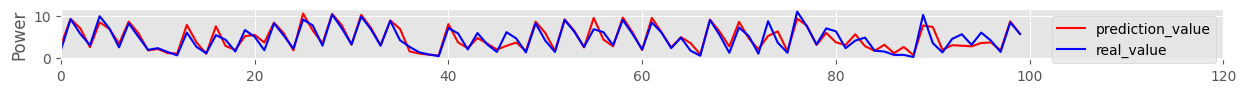

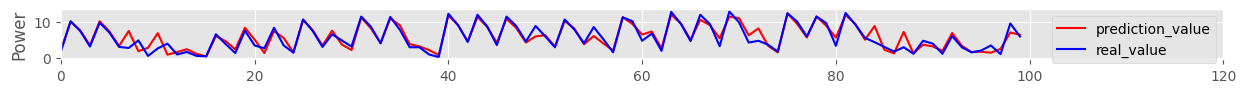

5.858997722095672


In [ ]:
#########30분후 예측 모델 일부분
# for i in range(0, len(delet_last_time)) :
z = 0
for i in range(0, round(len(yhat)/100)) :

  plt.figure(figsize = (15, 10))

  plt.subplot(round(len(yhat)/100), 1, i+1)
  plt.xlim([0, 120])
  pyplot.plot(yhat[z:z+100],'r', label='prediction_value')
  pyplot.plot(test_y1[z:z+100],'b', label='real_value')
  z = z+100

  plt.ylabel('Power')
  # plt.text(4,3, 'red = prediction_value')
  # plt.text(4,5, 'blue = real_value')
  plt.legend(loc='upper right')
  pyplot.show()
print(np.mean(test_y1))

In [ ]:
# 상관관계 계수를 계산하기 위한 데이터프레임 변경
import pandas as pd
y1 = pd.DataFrame(test_y1)
y2 = pd.DataFrame(yhat)
print(y1)
y_result1 = pd.concat([y1,y2],axis=1)
print(y_result1)

         0
0     16.3
1     15.9
2     11.7
3     11.0
4      8.0
...    ...
1312   0.9
1313  11.6
1314   8.7
1315   6.1
1316   1.4

[1317 rows x 1 columns]
         0          0
0     16.3  15.294079
1     15.9  15.463667
2     11.7  13.894785
3     11.0   9.912696
4      8.0   7.543655
...    ...        ...
1312   0.9   1.221819
1313  11.6  12.393938
1314   8.7   9.208242
1315   6.1   4.953357
1316   1.4   2.033159

[1317 rows x 2 columns]


In [ ]:
# 예측값과 실제값의 상관계수 계산
corr = y_result1.corr(method = 'pearson')
print(corr)

          0         0
0  1.000000  0.925099
0  0.925099  1.000000


In [ ]:
from sklearn.metrics import r2_score

r2_y_predict = r2_score(test_y1,yhat)

print(r2_y_predict)

0.8493572255765902


In [ ]:
len(test_x1[0,1])

6

In [ ]:
test_x1.shape

(1317, 5, 6)

In [ ]:
def adj_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)

adj_r2(r2_y_predict, len(yhat), len(test_x1[0,1]))

0.8486672586708341

<function matplotlib.pyplot.show(close=None, block=None)>

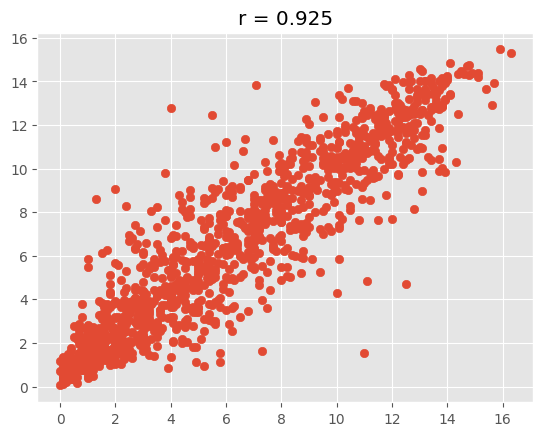

In [ ]:
plt.figure()
plt.title('r = {}'.format(round(corr.iloc[0, 1],3)))
plt.scatter(test_y1,yhat)
plt.show